In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('/Users/apple/Documents/abc/Capstone_project/outlier/2)gurgaon_properties_outlier_treated.csv')

In [22]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
1,1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.500000
2,3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,1,49,292.500000
3,4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174,665.000000
4,5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,1,159,266.000000


In [23]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

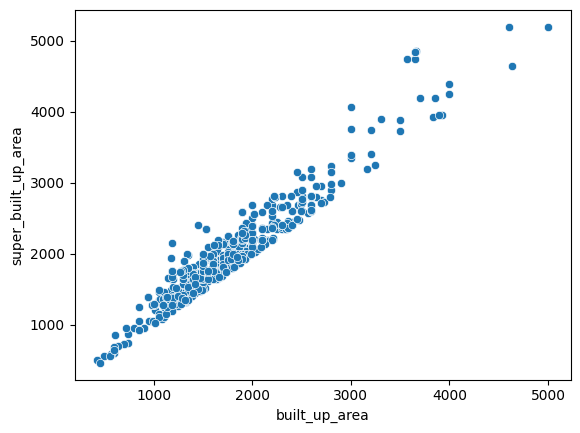

In [24]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

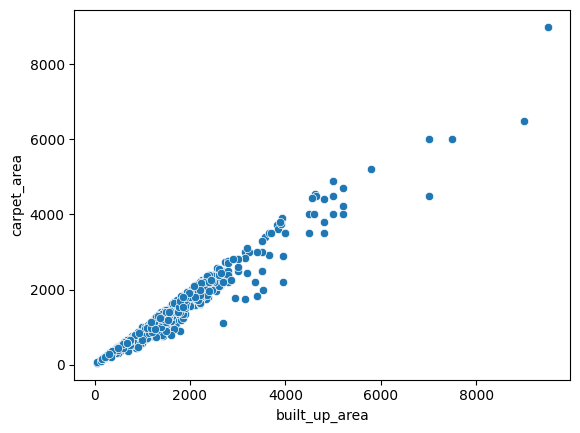

In [25]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])

In [26]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [27]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [28]:
all_present_df.shape

(531, 25)

In [29]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [30]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [31]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [32]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [33]:
sbc_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
4,5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,1,159,266.000000
38,42,flat,corona optus,sector 37c,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1,0,0,0,0,1,49,580.666667
40,44,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,0,26,682.333333
45,49,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0,0,0,0,0,1,146,509.000000


In [34]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [35]:
df.update(sbc_df)

In [36]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [37]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [38]:
sb_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,6,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,2,49,1337.500000
6,7,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,1,95,779.333333
7,8,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0,1,0,0,0,1,165,695.666667
12,13,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0,1,0,0,0,1,101,861.666667
15,16,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,16.0,South,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,2,60,682.666667


In [39]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df

In [40]:
df.update(sb_df)

In [41]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [43]:
c_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.50
11,12,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,1,52,550.00
13,14,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1,1,0,0,0,0,174,493.75
19,21,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,2,49,330.50
25,27,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0,0,0,0,0,1,0,311.00


In [44]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_ar

In [45]:
df.update(c_df)

In [46]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

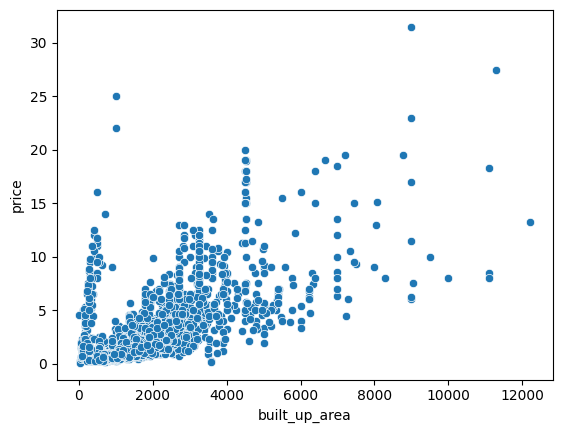

In [48]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [49]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [50]:
anamoly_df.sample(5)

,price,area,built_up_area
832,5.50,2700.0,300.0
1869,3.98,2200.0,1991.0
2569,3.67,2040.0,1846.0
1944,2.60,4986.0,616.0
3118,11.00,4050.0,360.0


In [51]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [52]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

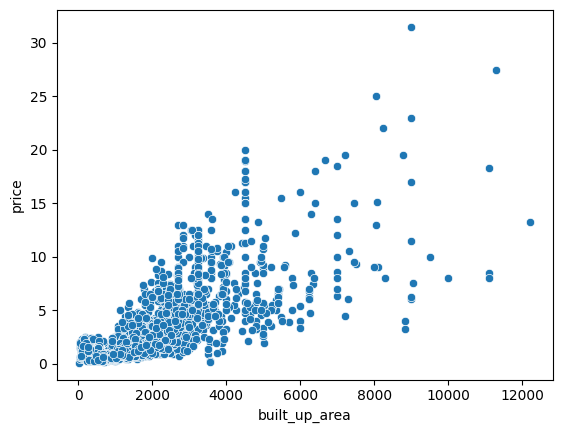

In [53]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [54]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [55]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,1,8
1,1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New Property,1226.0,1,1,0,0,0,1,38
2,3,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New Property,1000.0,0,0,0,0,0,1,49
3,4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,1,2,174
4,5,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Relatively New,582.0,0,0,1,0,0,1,159


In [56]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [57]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,521,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,1,0
767,800,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,1,9
1294,1348,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,1,0
1452,1528,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
1465,1541,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,1,0
1946,2058,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
2048,2166,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,1,88
2157,2281,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,1,0
2271,2405,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,2,114
2439,2586,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,2,130


In [58]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [59]:
df['floorNum'].fillna(2.0,inplace=True)

/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_8538/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [60]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [61]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

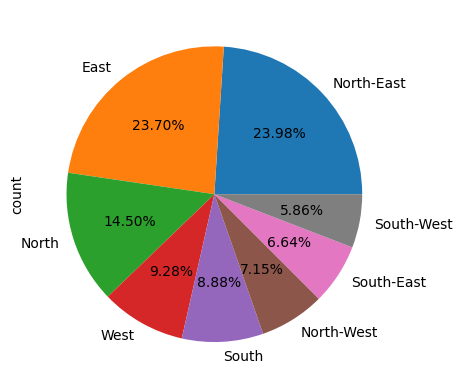

In [62]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [63]:
df.drop(columns=['facing'],inplace=True)

In [64]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3485,3727,flat,whiteland the aspen,sector 76,3.35,17613.0,3,4,3+,5.0,Under Construction,2111.0,0,1,0,0,0,0,151
1654,1744,flat,mvn athens,sohna road,0.25,5187.0,2,2,1,3.0,Relatively New,535.0,0,0,0,0,0,1,51
1700,1795,flat,breez global hill view,sohna road,0.42,7179.0,2,2,1,18.0,Relatively New,650.0,0,0,0,0,0,1,44
690,718,flat,rof ananda,sector 95,0.26,6032.0,1,1,1,8.0,New Property,406.0,0,0,0,0,0,1,49
1936,2046,flat,emaar mgf emerald floors premier,sector 65,2.36,14303.0,3,3,3,0.0,Relatively New,1493.0,1,1,0,0,0,2,159


In [65]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [66]:
df.drop(index=[2536],inplace=True)

In [67]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [69]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,11,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,1,0
33,35,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,1,0
48,52,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,1,45
70,76,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.0,0,0,0,0,0,1,0
74,81,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,3739,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.0,0,0,0,0,0,1,0
3502,3745,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,Undefined,1242.0,0,0,0,0,0,1,59
3508,3751,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,1,0
3520,3765,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,1,0


In [ ]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [72]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [73]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [74]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [75]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [76]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [77]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [79]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [80]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [81]:
df.shape

(3554, 19)